<a href="https://colab.research.google.com/github/ClarisseAlvarenga/data_science_alura_cursos/blob/master/EDA_Gorjetas_Data_Visualization_com_Seaborn_Nova_base_de_Gorjetas_curso_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTANDO A BASE DE DADOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
pd.read_csv('tips_atualizado.csv')

,total_bill,tip,dessert,day,time,size
0,16.990000,1.010000,No,Sun,Dinner,2
1,10.340000,1.660000,No,Sun,Dinner,3
2,21.010000,3.500000,No,Sun,Dinner,3
3,23.680000,3.310000,No,Sun,Dinner,2
4,24.590000,3.610000,No,Sun,Dinner,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,No,Sat,Dinner,3
3412,25.531567,1.604021,Yes,Sat,Dinner,2
3413,21.547132,1.733914,Yes,Sat,Dinner,2
3414,18.966233,1.718951,No,Sat,Dinner,2


In [4]:
#armazenando a leitura numa variavel
dados = pd.read_csv('tips_atualizado.csv')


In [5]:
#conferindo uma amostra dos dados
dados.sample(10)

,total_bill,tip,dessert,day,time,size
3081,25.474307,1.560595,No,Sun,Dinner,4
3171,18.696202,2.787019,No,Thur,Dinner,2
566,20.648808,2.596662,No,Thur,Lunch,2
785,10.288835,1.695658,No,Sun,Dinner,2
779,34.176802,4.083297,No,Sun,Dinner,4
2220,19.895307,3.285084,No,Sat,Dinner,2
2924,29.143571,1.641505,Yes,Sat,Dinner,2
525,17.365264,2.922233,No,Sat,Dinner,3
2307,6.668785,1.097580,No,Sat,Dinner,1
2225,20.115701,2.449976,No,Sat,Dinner,2


# TRADUÇÃO DOS DADOS

In [6]:
#visualizando as colunas
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

## Traduzindo o rótulo das colunas

In [7]:
#criando um dicionário para facilitar a renomeação
renomear = {'total_bill': 'valor_da_conta', 
            'tip': 'gorjeta', 
            'dessert': 'sobremesa', 
            'day': 'dia_da_semana', 
            'time': 'hora_do_dia', 
            'size': 'total_de_pessoas'}

In [8]:
type(dados)

pandas.core.frame.DataFrame

In [9]:
#mudando o nome da variável dados, aproveitando para renomear as colunas
gorjeta = dados.rename(columns=renomear)

In [10]:
gorjeta.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Traduzindo os campos

In [11]:
#conferindo dados únicos em uma coluna
gorjeta.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [12]:
sim_nao = {'No' : 'Não', 
           'Yes' : 'Sim'}

In [13]:
#mapeando o df com nosso dicionário sim_não
gorjeta.sobremesa.map(sim_nao)

0       Não
1       Não
2       Não
3       Não
4       Não
       ... 
3411    Não
3412    Sim
3413    Sim
3414    Não
3415    Não
Name: sobremesa, Length: 3416, dtype: object

In [14]:
#fazendo a alteração
gorjeta.sobremesa = gorjeta.sobremesa.map(sim_nao)

In [15]:
gorjeta.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [16]:
#fazendo a mesma coisa para o dia da semana
gorjeta.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [17]:
dia_semana = {'Sun' : 'Domingo', 
              'Sat' : 'Sábado', 
              'Thur' : 'Quinta', 
              'Fri' : 'Sexta'}

In [18]:
#alterando o dia da semana
gorjeta.dia_da_semana = gorjeta.dia_da_semana.map(dia_semana)

In [19]:
gorjeta.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [20]:
#fazendo com a hora do dia
gorjeta.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [21]:
hora = {'Dinner': 'Jantar',
        'Lunch' : 'Almoço'}

In [22]:
gorjeta.hora_do_dia = gorjeta.hora_do_dia.map(hora)

In [23]:
#Pegando uma amostra para visualizar dados diversos
gorjeta.sample(10)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
2798,27.873690,3.145188,Não,Domingo,Jantar,3
513,18.824817,2.323822,Não,Sábado,Jantar,4
124,12.480000,2.520000,Não,Quinta,Almoço,2
1094,11.403831,1.622516,Não,Quinta,Almoço,2
1440,11.381805,2.388997,Sim,Sexta,Almoço,2
2840,44.560756,3.814538,Não,Domingo,Jantar,6
38,18.690000,2.310000,Não,Sábado,Jantar,3
1991,31.893111,3.937817,Não,Sábado,Jantar,3
2907,16.909277,2.903959,Não,Sexta,Almoço,3
2922,34.287479,3.553633,Não,Sábado,Jantar,3


In [24]:
#conferindo a versão do seaborn
!pip show seaborn

Name: seaborn
Version: 0.10.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, scipy, matplotlib, pandas
Required-by: missingno


# ANÁLISE 1 - VALOR DA CONTA E GORJETA

In [25]:
#relembrando as colunas
gorjeta.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

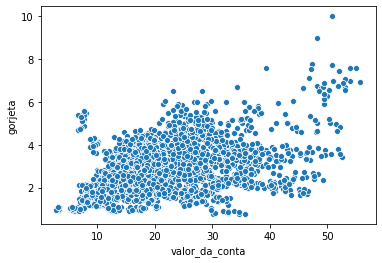

In [26]:
#criando um scatterplot - ele cria uma imagem que pode ser salva numa variável
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjeta)

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [27]:
#vendo o tamanho dos dados
print(f'a base de dados contém {gorjeta.shape[0]} registros')
print(f'Registros não nulos: \n{gorjeta.count()}')

a base de dados contém 3416 registros
Registros não nulos: 
valor_da_conta      3416
gorjeta             3416
sobremesa           3416
dia_da_semana       3416
hora_do_dia         3416
total_de_pessoas    3416
dtype: int64


## Criando o campo porcentagem

In [28]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [29]:
#criando a coluna dividindo o valor da gorjeta pelo valor da conta
gorjeta['porcentagem'] = gorjeta.gorjeta / gorjeta.valor_da_conta

In [30]:
gorjeta.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [31]:
#arredondando os dados da coluna porcentagem
gorjeta.porcentagem = gorjeta.porcentagem.round(2)

In [32]:
gorjeta.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


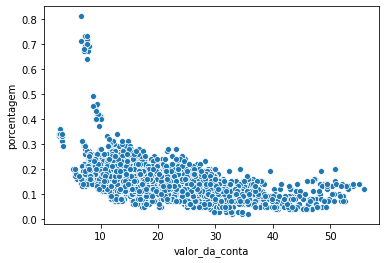

In [33]:
#visualizando o gráfico anterior com a porcentagem da gorjeta
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y = 'porcentagem', data=gorjeta)

**Visualmente o valor da conta não é proporcional ao valor da gorjeta**

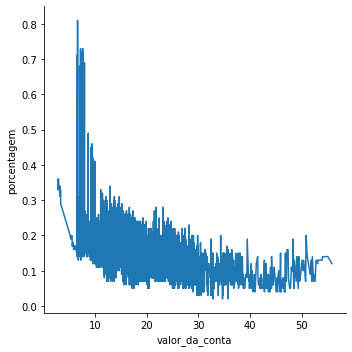

In [34]:
#gerando uma outra visualização, usando o formato de linha
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjeta)

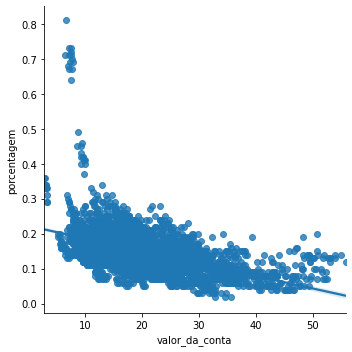

In [35]:
#verificando um terceiro gráfico
porcentagem_lmplot = sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjeta)

# ANÁLISE 2 - SOBREMESA

In [36]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06


In [37]:
#visualizando todos os que pediram sobremesa
gorjeta[gorjeta.sobremesa == 'Sim']

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
56,38.010000,3.000000,Sim,Sábado,Jantar,4,0.08
58,11.240000,1.760000,Sim,Sábado,Jantar,2,0.16
60,20.290000,3.210000,Sim,Sábado,Jantar,2,0.16
61,13.810000,2.000000,Sim,Sábado,Jantar,2,0.14
62,11.020000,1.980000,Sim,Sábado,Jantar,2,0.18
...,...,...,...,...,...,...,...
3406,16.882586,2.967175,Sim,Sábado,Jantar,2,0.18
3408,11.840990,1.044625,Sim,Sábado,Jantar,2,0.09
3409,34.704251,0.882144,Sim,Sábado,Jantar,2,0.03
3412,25.531567,1.604021,Sim,Sábado,Jantar,2,0.06


In [38]:
gorjeta[gorjeta.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,20.800076,2.710137,2.408602,0.153425
std,9.901358,1.162280,0.806690,0.088961
min,2.799644,0.766203,1.000000,0.020000
25%,13.495501,1.911661,2.000000,0.090000
50%,17.917059,2.434354,2.000000,0.150000
75%,26.807493,3.326298,3.000000,0.190000
max,55.804318,10.000000,5.000000,0.810000


In [39]:
gorjeta[gorjeta.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,2114.000000,2114.000000,2114.000000,2114.000000
mean,19.223436,2.711837,2.668874,0.150033
std,8.316030,1.024271,1.014848,0.044248
min,6.533329,0.910509,1.000000,0.040000
25%,13.281977,1.931135,2.000000,0.120000
50%,17.736923,2.608222,2.000000,0.150000
75%,22.749482,3.284578,3.000000,0.180000
max,53.091371,9.000000,6.000000,0.330000


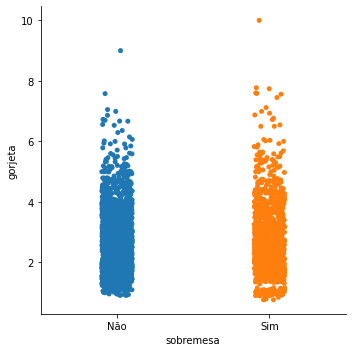

In [40]:
#fazendo um gráfico categórico
ax = sns.catplot(x='sobremesa', y='gorjeta', data=gorjeta)

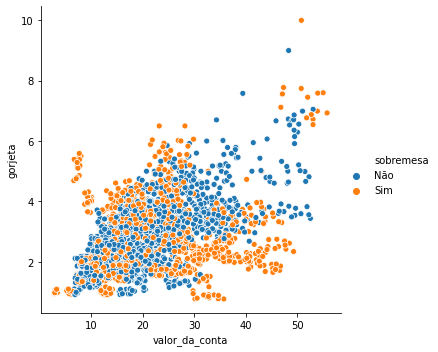

In [41]:
ax = sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjeta)

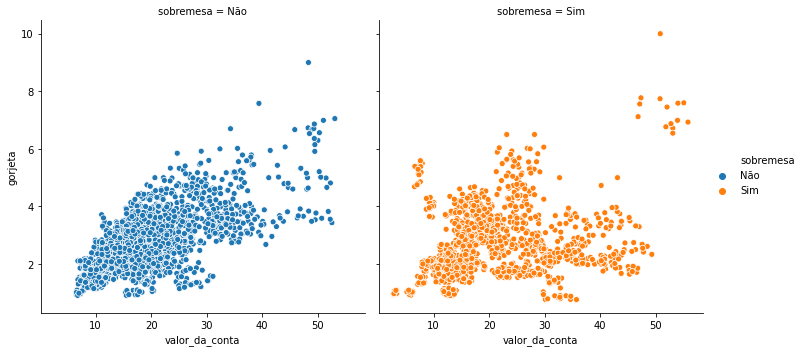

In [42]:
ax = sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjeta, col='sobremesa')

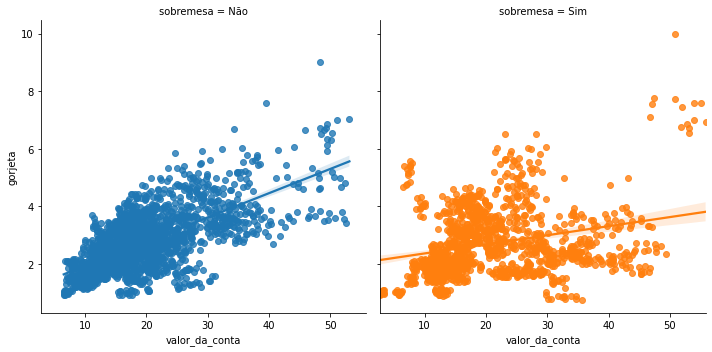

In [43]:
ax = sns.lmplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjeta, col='sobremesa')

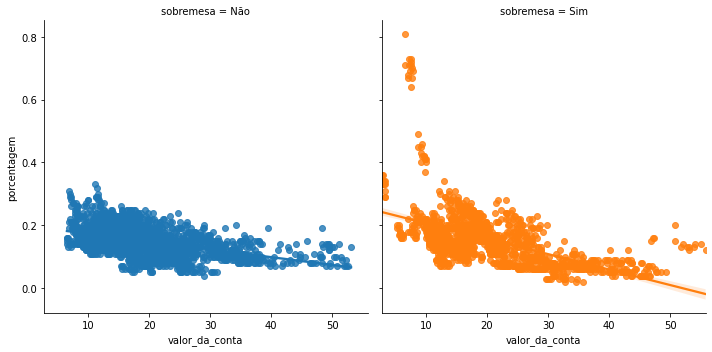

In [44]:
ax = sns.lmplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', data=gorjeta, col='sobremesa')

**Visualmente existe uma diferença nas gorjetas entre quem pediu e quem não pediu sobremesa**

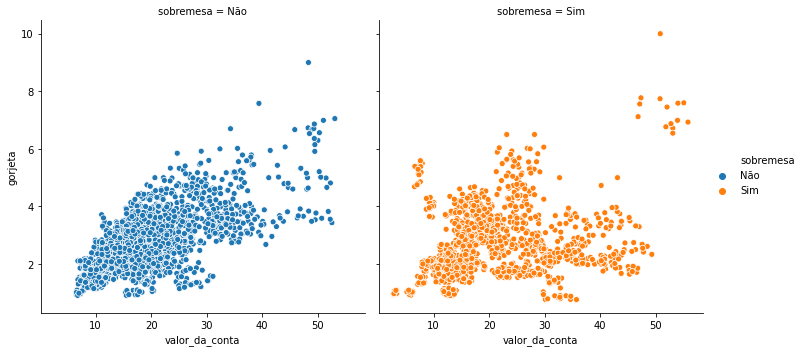

In [45]:
ax = sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjeta, col='sobremesa')

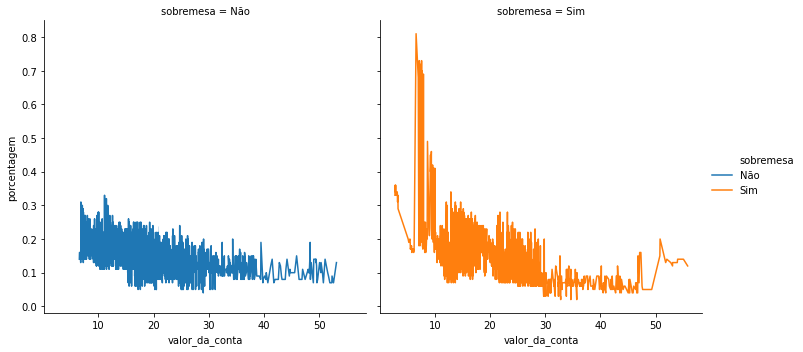

In [46]:
ax = sns.relplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', data=gorjeta, col='sobremesa', kind='line')

# TESTE DE HIPÓTESE

## **H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

## **H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [47]:
from scipy.stats import ranksums

In [48]:
sobremesa = gorjeta.query('sobremesa == "Sim"').porcentagem

In [49]:
sem_sobremesa = gorjeta.query('sobremesa == "Não"').porcentagem

In [50]:
_, p_value = ranksums(sobremesa, sem_sobremesa)

In [51]:
print(f'O valor do p_value é {p_value}')

O valor do p_value é 0.033144013617673405


**Usando o nível de confiança de 95% é possível rejeitar a hipótese nula**

# ANÁLISE 3 - DIAS DA SEMANA

In [52]:
gorjeta.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [53]:
gorjeta.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

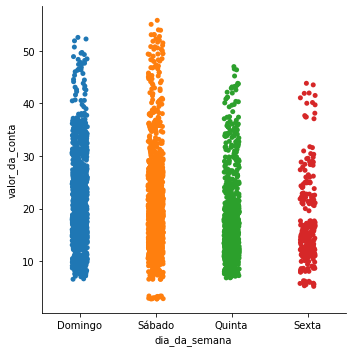

In [54]:
#conferindo dias da semana X valor da conta separadamente
ax = sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjeta)

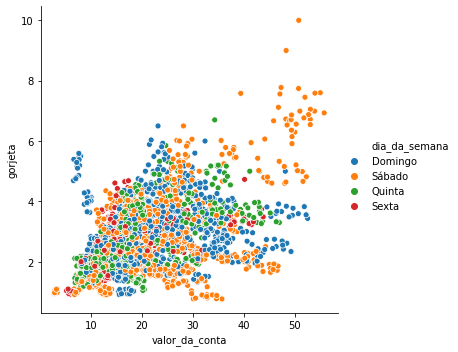

In [55]:
#conferindo gorjeta X valor da conta por dia da semana num único plot
ax = sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjeta)

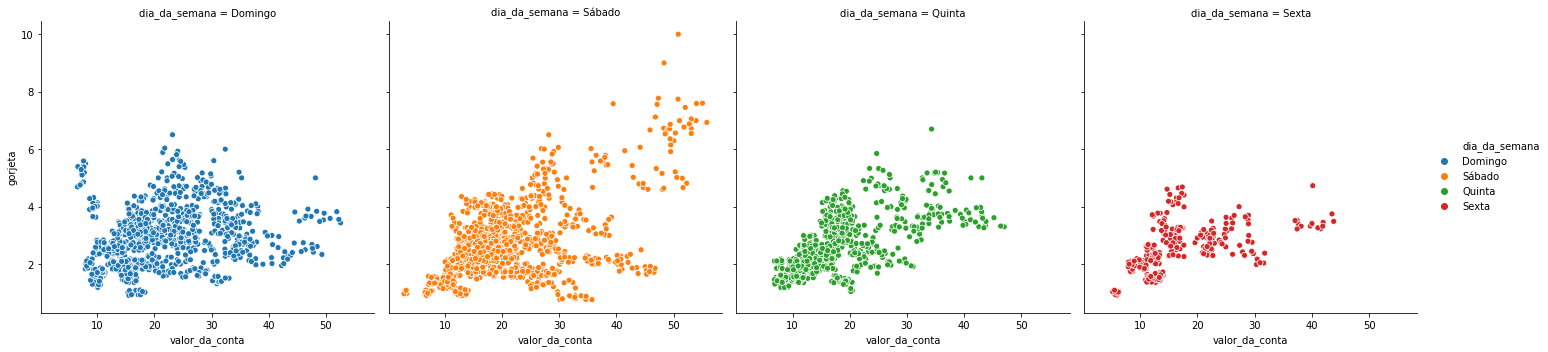

In [56]:
#conferindo gorjeta X valor da conta por dia da semana em plots separados
ax = sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana' ,data=gorjeta)

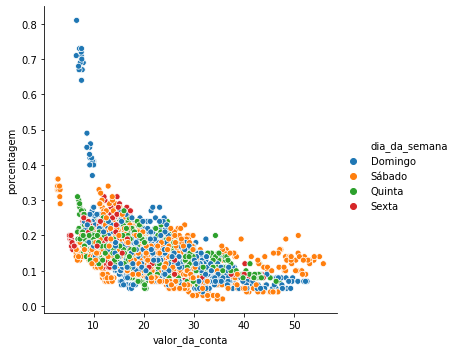

In [57]:
#conferindo a porcentagem da gorjeta X valor da conta por dia da semana num único plot
ax = sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjeta)

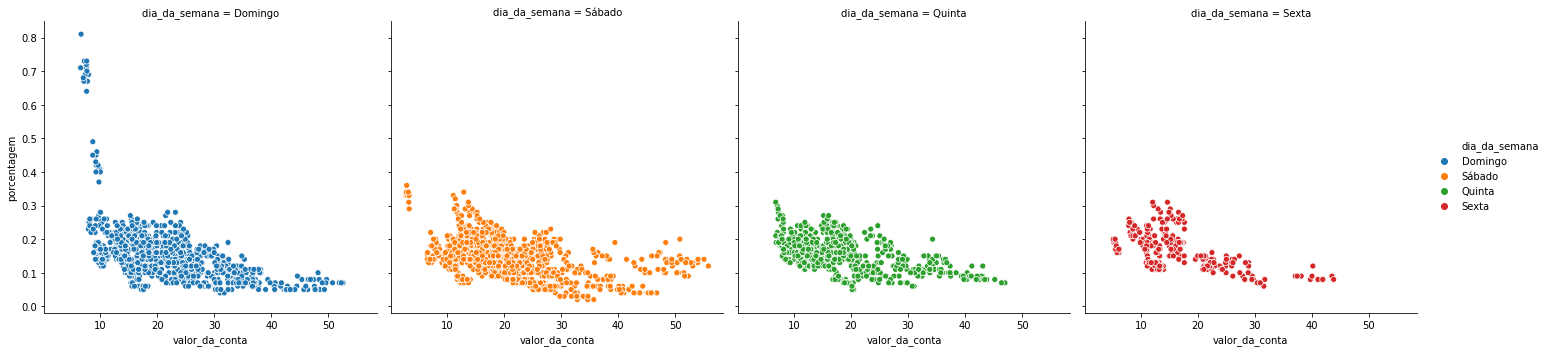

In [58]:
#conferindo a porcentagem da gorjeta X valor da conta por dia da semana em plots separados
ax = sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana',data=gorjeta)

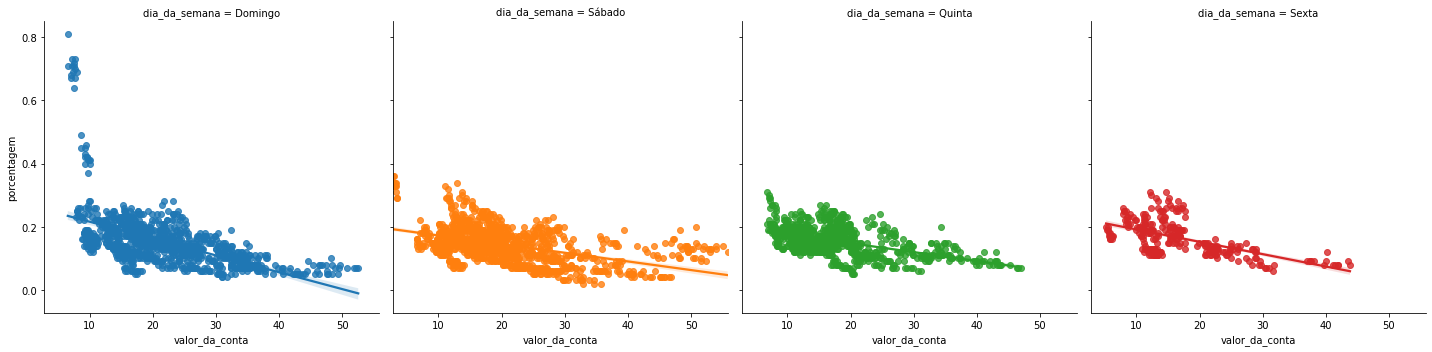

In [59]:
#conferindo a porcentagem da gorjeta X valor da conta por dia da semana em plots separados criando uma linha de regressão
ax = sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana',data=gorjeta)

In [60]:
media_geral_gorjetas = gorjeta.gorjeta.mean()

In [61]:
print(f'A média geral das gorjetas é de: {media_geral_gorjetas}')

A média geral das gorjetas é de: 2.7111892140916103


In [62]:
gorjeta.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.439133,2.902079,0.154953
Quinta,17.724088,2.556177,0.154090
Sexta,17.215616,2.549960,0.163158
Sábado,20.480249,2.690114,0.143604


In [63]:
#frequência dos dias
gorjeta.dia_da_semana.value_counts()

Sábado     1218
Domingo    1064
Quinta      868
Sexta       266
Name: dia_da_semana, dtype: int64

## Teste de Hipótese

## **H<sup>null</sup>**
> **A distribuição do valor da conta é igual no Sábado e no Domingo**

## **H<sup>alt</sup>**
> **A distribuição do valor da conta NÃO é igual no Sábado e no Domingo**

In [64]:
valor_conta_domingo = gorjeta.query('dia_da_semana =="Domingo"').valor_da_conta

In [65]:
valor_conta_sabado = gorjeta.query('dia_da_semana =="Sábado"').valor_da_conta

In [66]:
_, p_value = ranksums(valor_conta_domingo, valor_conta_sabado)

In [67]:
p_value

0.0004435935681441821

**Com 95% de confiança, podemos rejeitar a hipótese nula**

**Exercício** 

Comparando os dias de Sábado e de Quinta

In [68]:
valor_conta_quinta = gorjeta.query('dia_da_semana =="Quinta"').valor_da_conta

In [69]:
ranksums(valor_conta_sabado, valor_conta_quinta)

RanksumsResult(statistic=7.603895655063532, pvalue=2.873469664025779e-14)

**Com 95% de confiança, rejeitamos a hipótese nula de que o valor da conta no Sábado é pertencente segue a mesma distribuição do valor da conta na Quinta Feira**

# ANÁLISE 4 - HORA DO DIA

In [70]:
gorjeta.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

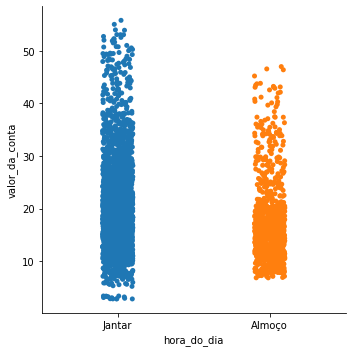

In [71]:
ax = sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjeta)

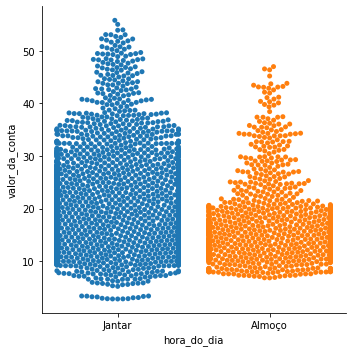

In [72]:
ax = sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjeta, kind='swarm')

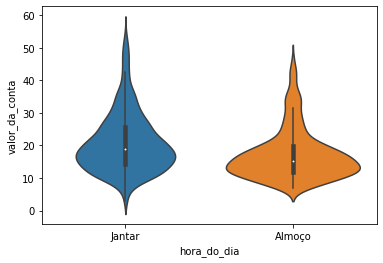

In [73]:
ax= sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjeta)

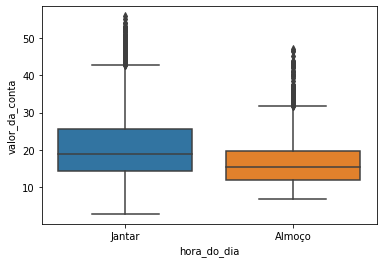

In [74]:
ax= sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjeta)

In [75]:
almoco = gorjeta.query('hora_do_dia =="Almoço"').valor_da_conta

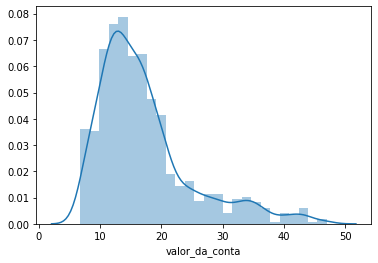

In [76]:
ax = sns.distplot(almoco)

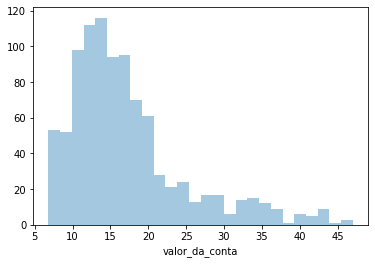

In [77]:
ax = sns.distplot(almoco, kde=False)

In [78]:
jantar = gorjeta.query('hora_do_dia =="Jantar"').valor_da_conta

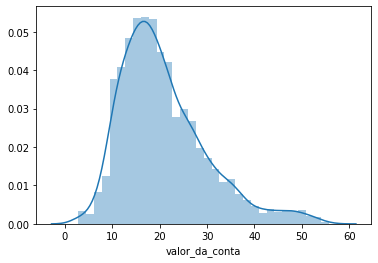

In [79]:
ax = sns.distplot(jantar)

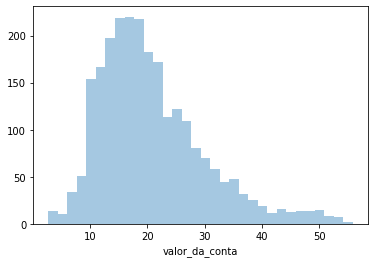

In [80]:
ax = sns.distplot(jantar, kde=False)

In [81]:
gorjeta.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.213913,2.534495,0.157668
Jantar,20.832954,2.779458,0.148876


## Teste de Hipótese

## **H<sup>null</sup>**
> **A distribuição do valor da conta é igual no almoço e no jantar**

## **H<alt>null</sup>**
> **A distribuição do valor da conta NÃO é igual no almoço e no jantar**

In [82]:
_, p_value = ranksums(almoco,jantar)

In [83]:
p_value

5.169201062207143e-34

In [84]:
print(f'o valor do p-value é de {p_value}')

o valor do p-value é de 5.169201062207143e-34


**Neste caso, com 95% de confiança, podemos rejeitar a hipótese nula e aceitar a hipótese alternativa**

## Teste de Hipótese 2

## **H<sup>null</sup>**
> **A distribuição da porcentagem da gorjeta é igual no almoço e no jantar**

## **H<alt>null</sup>**
> **A distribuição da porcentagem da gorjeta NÃO é igual no almoço e no jantar**

In [85]:
porcentagem_almoco = gorjeta.query('hora_do_dia == "Almoço"').porcentagem

In [86]:
porcentagem_jantar = gorjeta.query('hora_do_dia == "Jantar"').porcentagem

In [87]:
r2 = ranksums(porcentagem_almoco, porcentagem_jantar)

In [88]:
r2.pvalue

1.3785725618355523e-11

Neste caso, com 95% de confiança, podemos rejeitar a hipótese nula de que a distribuição da porcentagem da gorjeta é igual no almoço e no jantar